In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Remove zero values to clean data.

In [9]:
df = pd.read_csv('nrg_cb_em_linear.csv')
df['TIME_PERIOD'] = [int(x[:4]) * 12 + int(x[5:]) - 1 for x in df['TIME_PERIOD']]
df = df[df['OBS_VALUE'] != 0]
df.sort_values(['geo', 'nrg_bal', 'TIME_PERIOD'], inplace=True)

In [3]:
tpmin, tpmax = df['TIME_PERIOD'].min(), df['TIME_PERIOD'].max()

Display data for each country & energy balance.

C:\Users\Utente\AppData\Local\Temp\ipykernel_16812\1887428823.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df_by_geo[df['nrg_bal'] == nrg_bal]


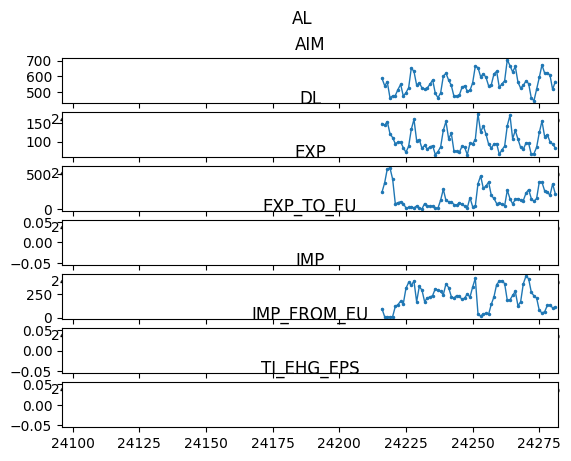

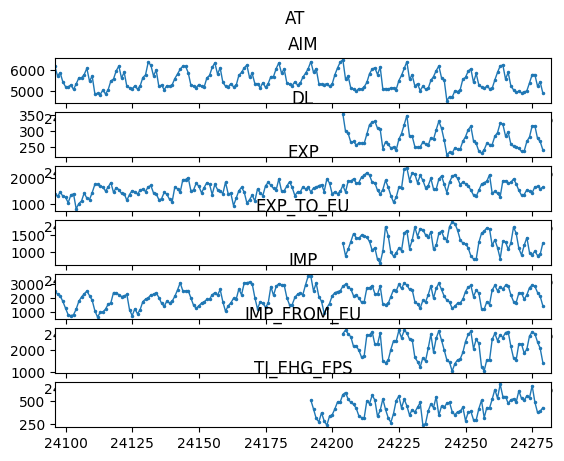

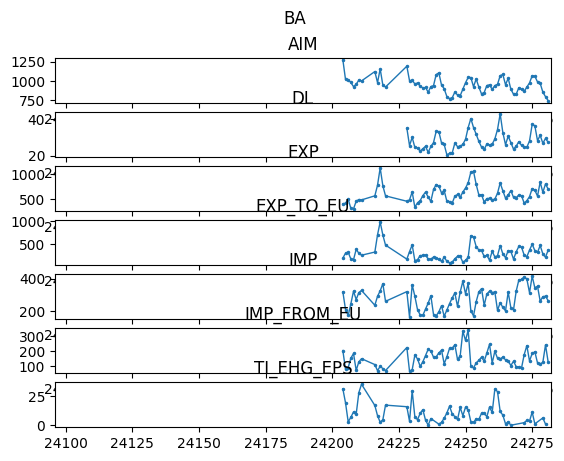

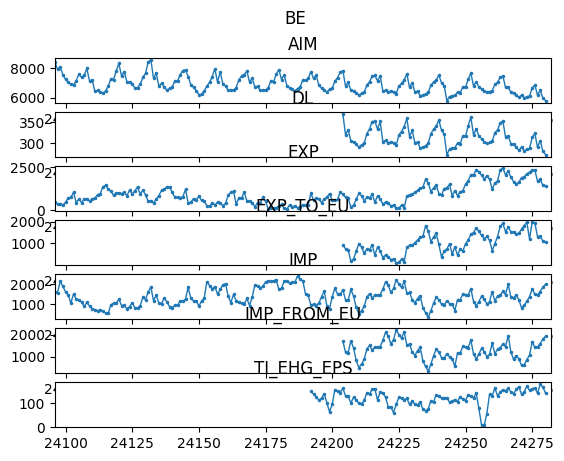

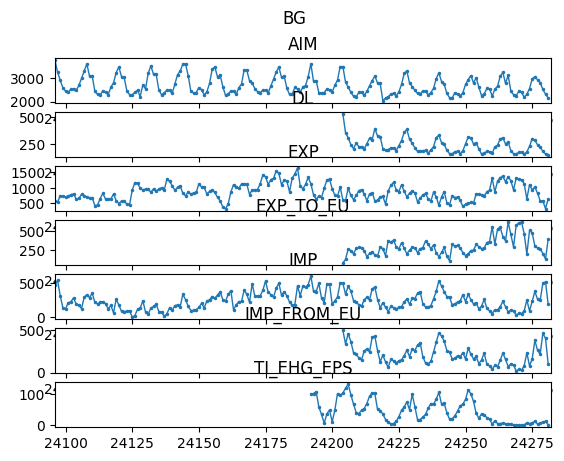

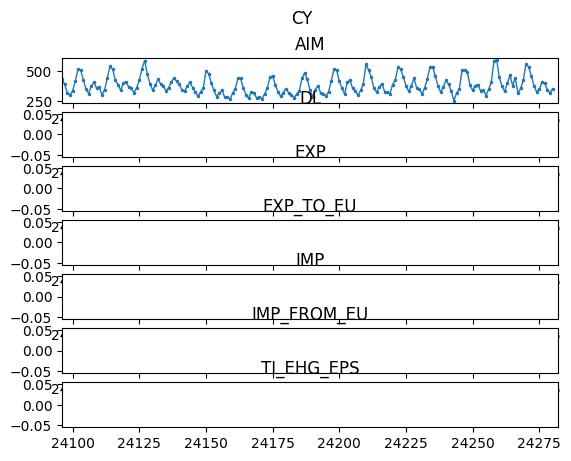

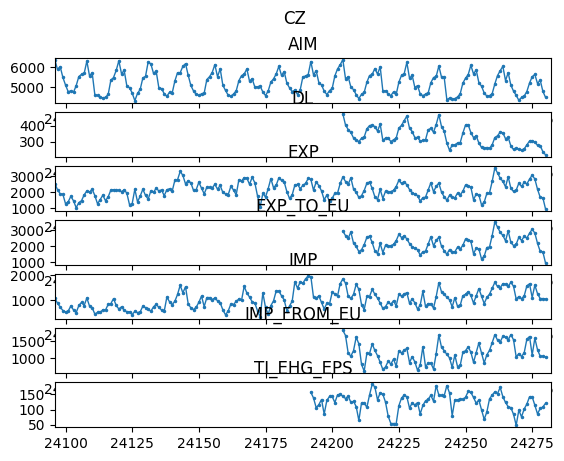

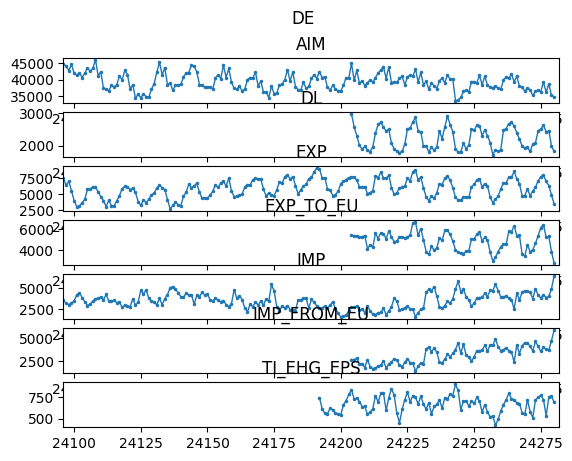

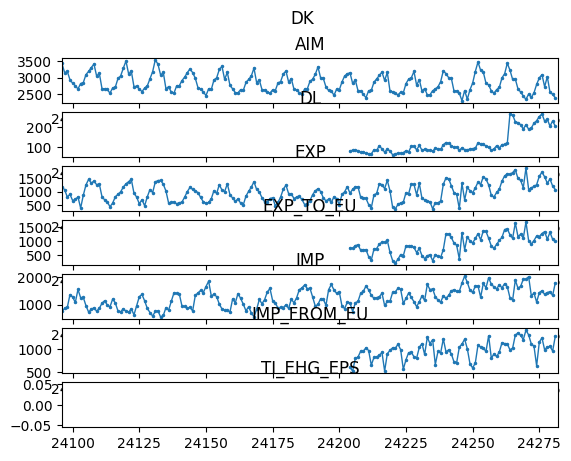

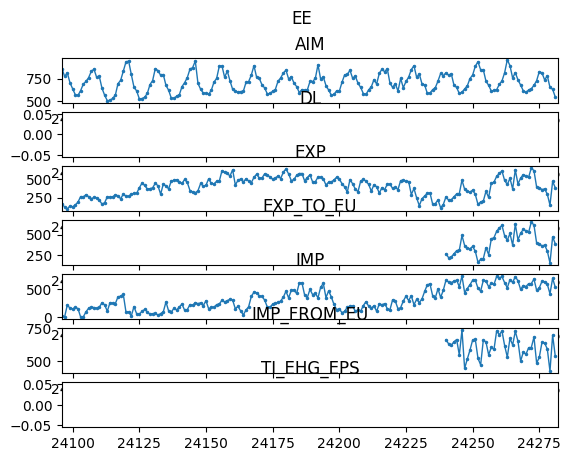

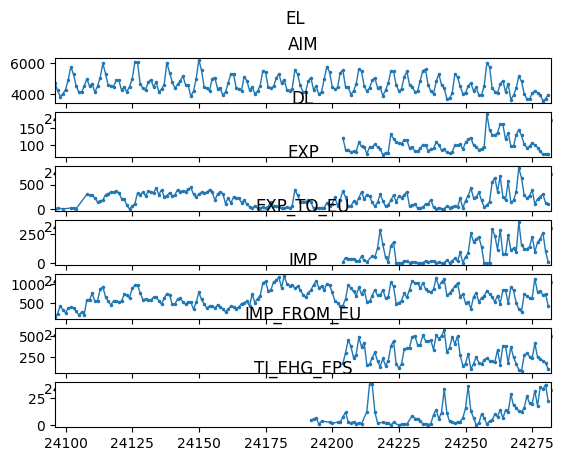

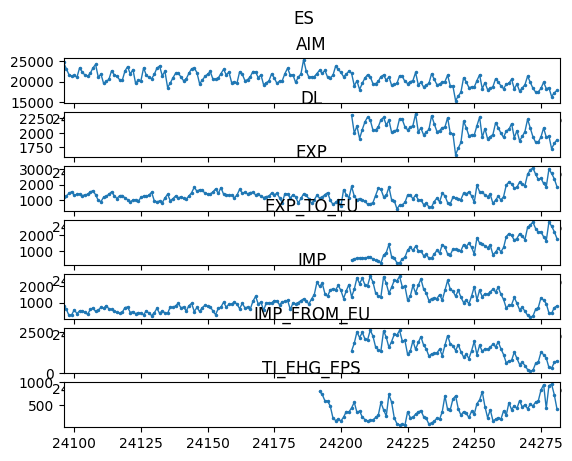

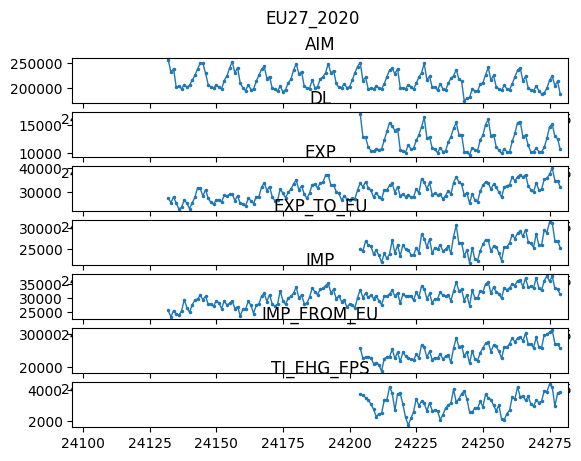

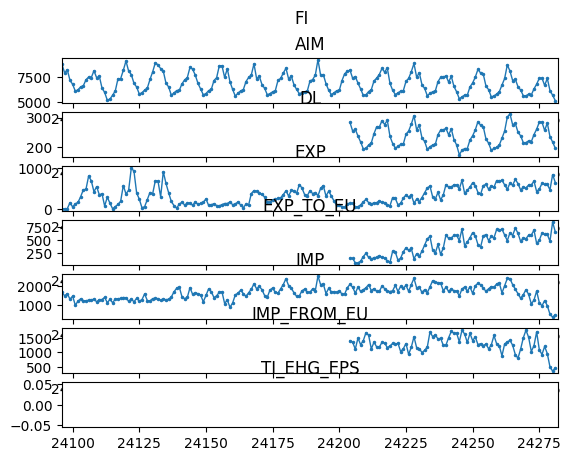

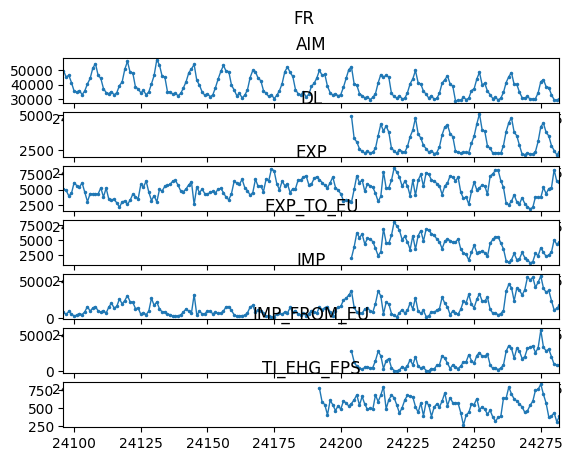

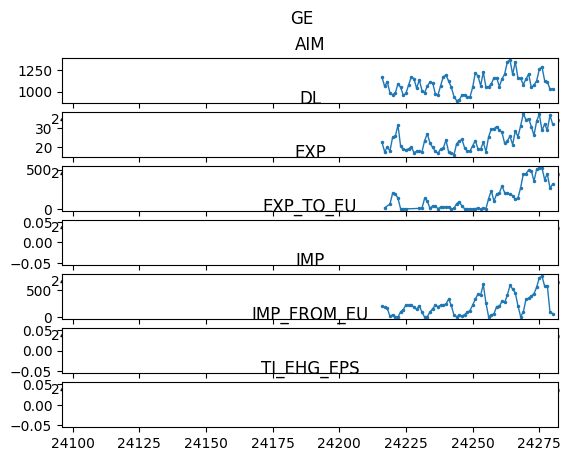

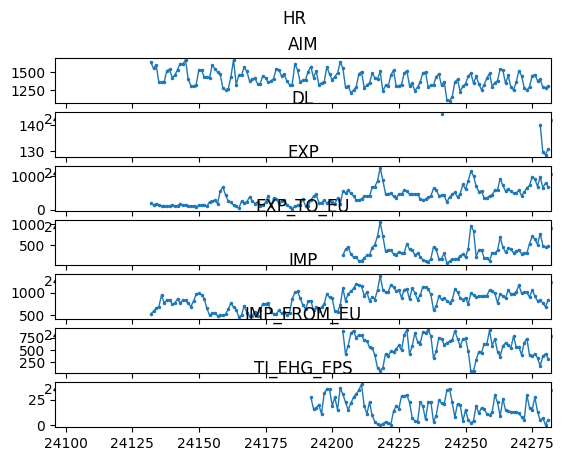

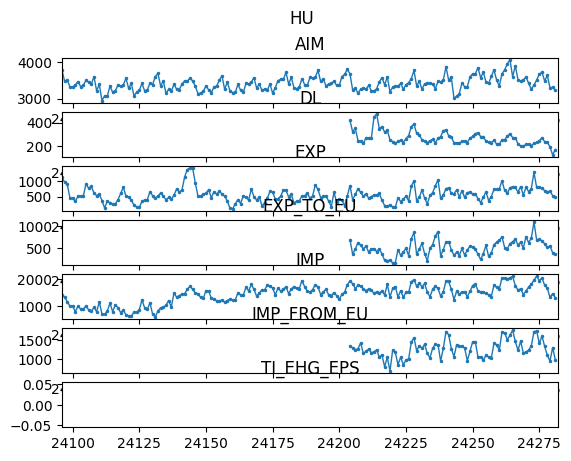

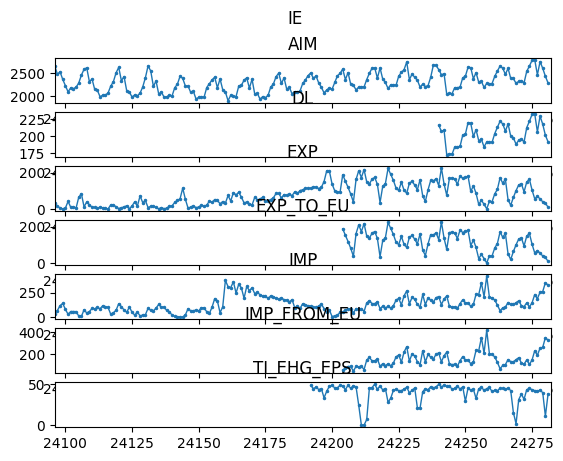

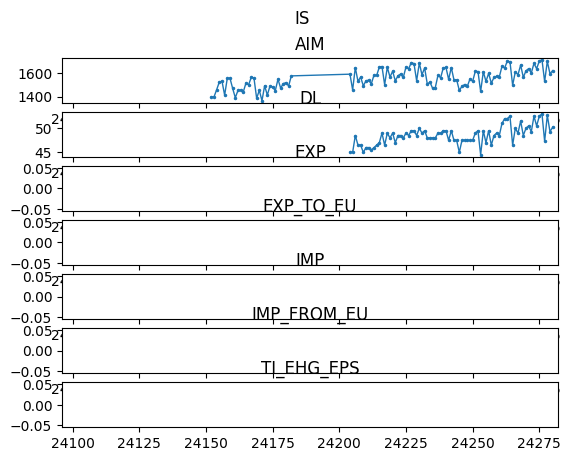

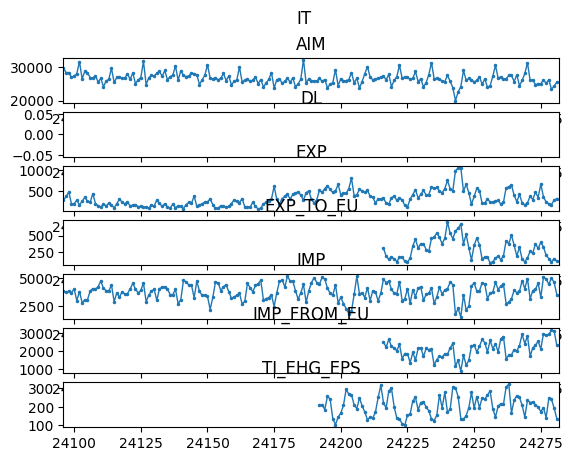

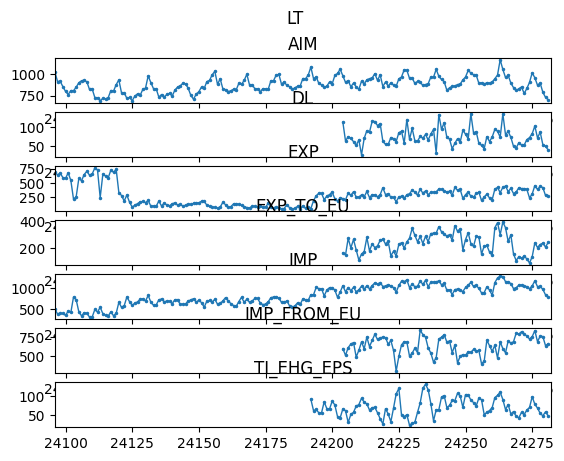

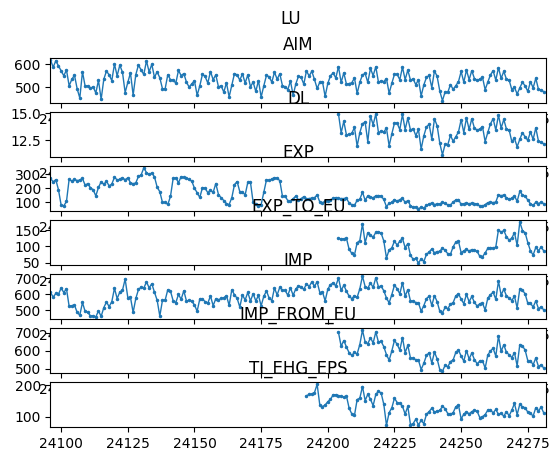

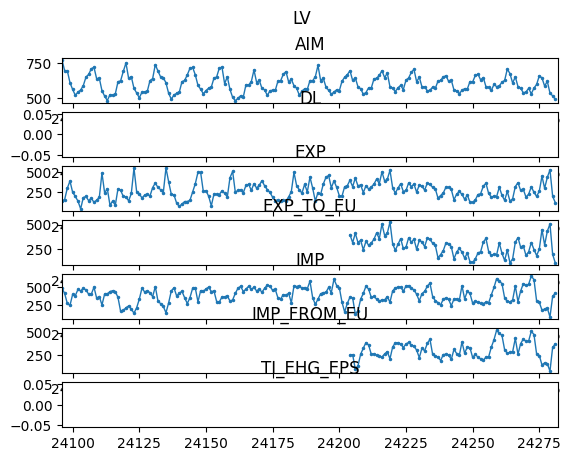

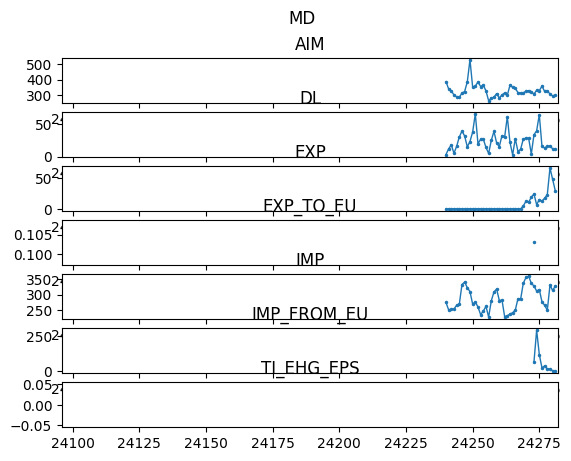

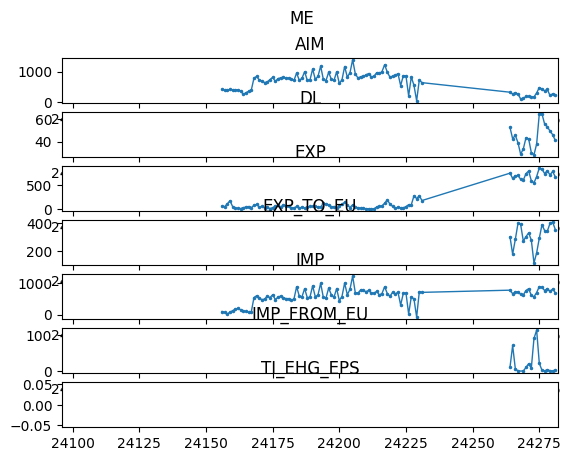

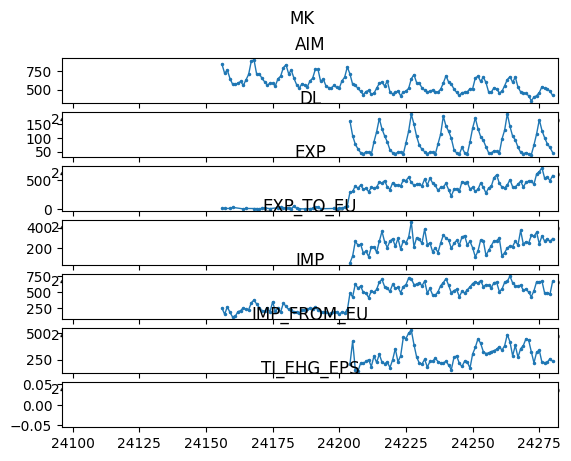

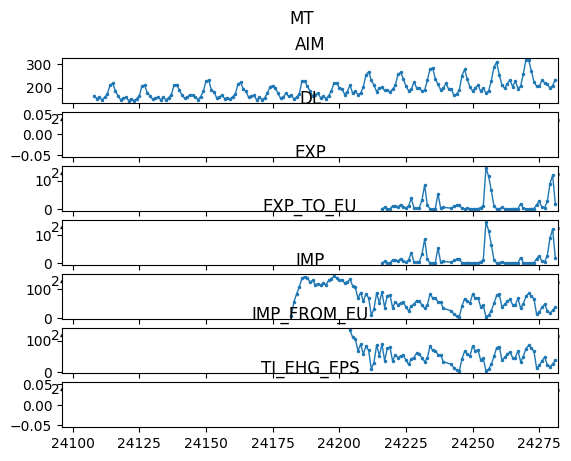

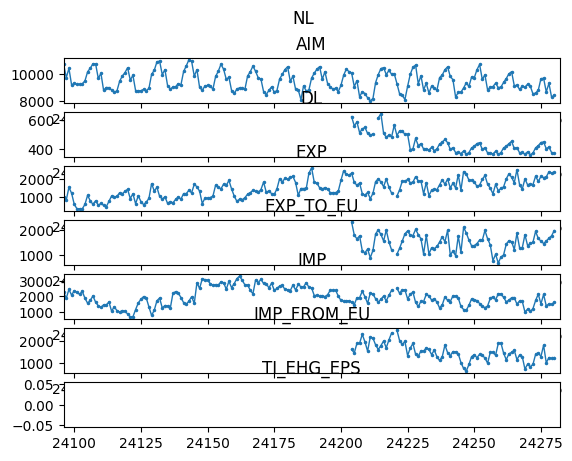

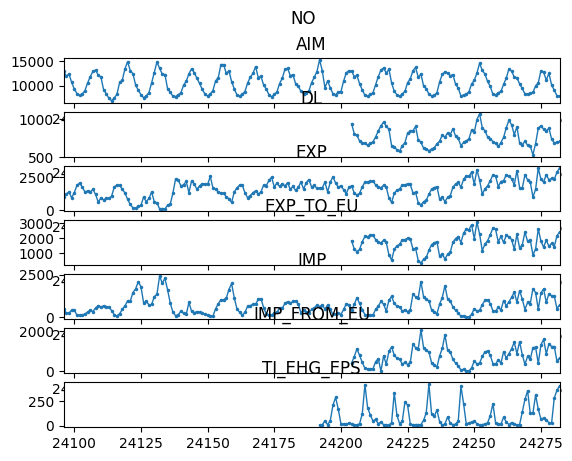

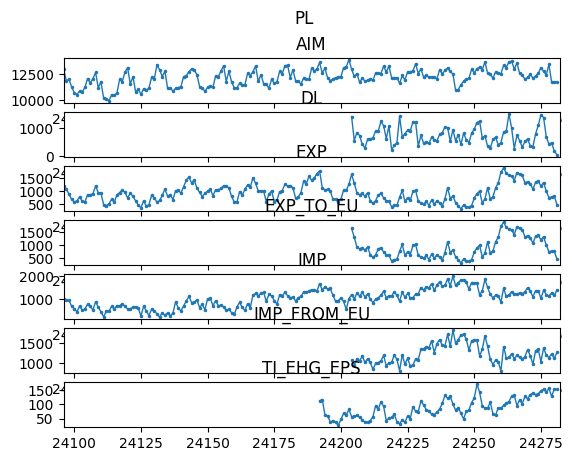

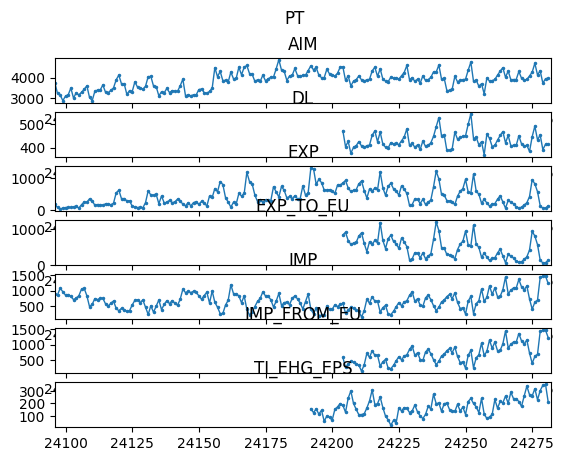

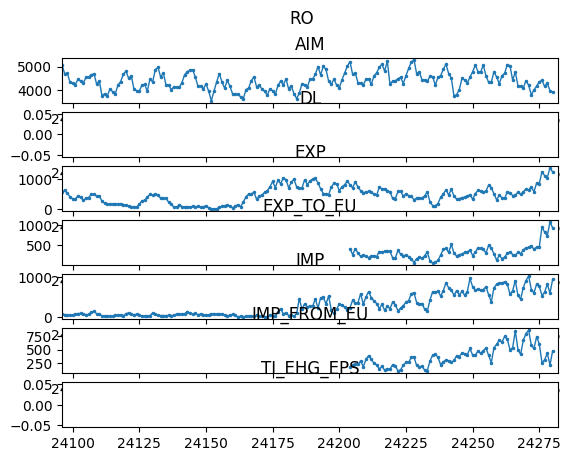

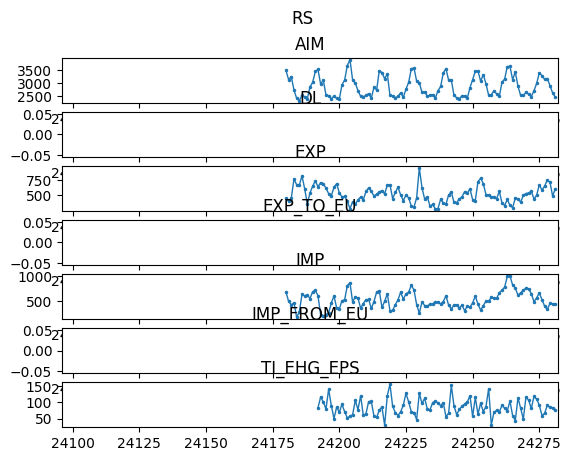

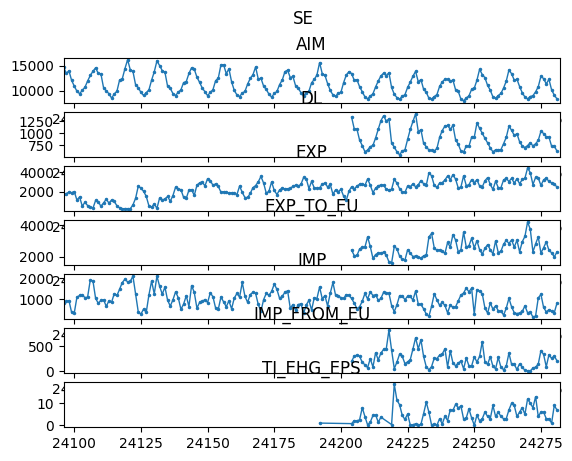

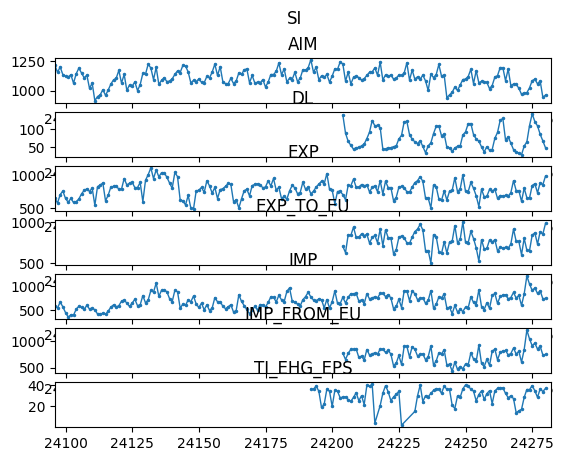

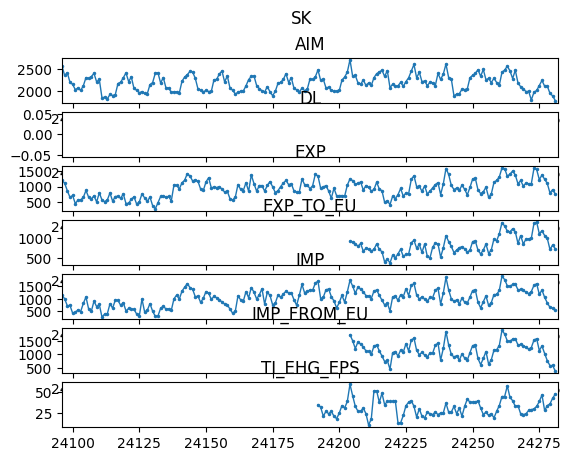

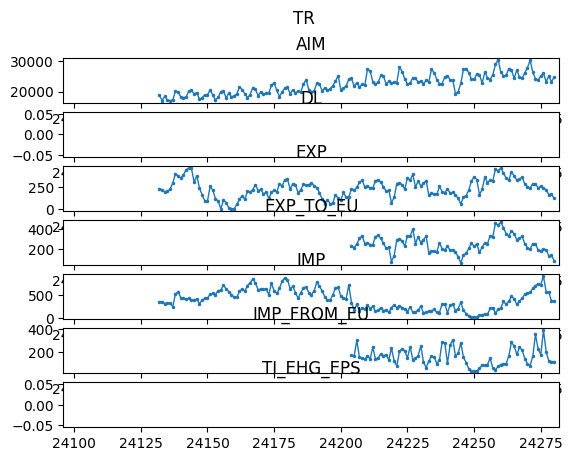

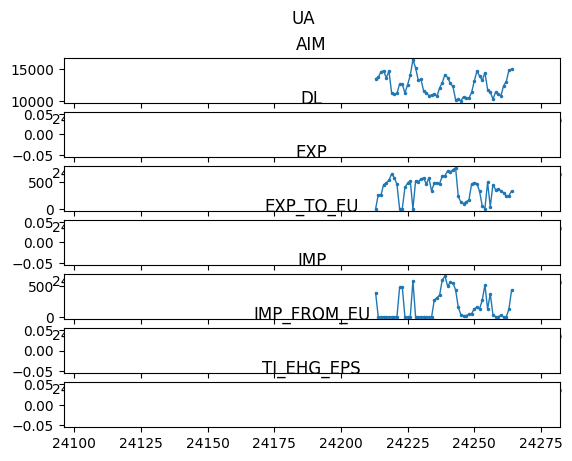

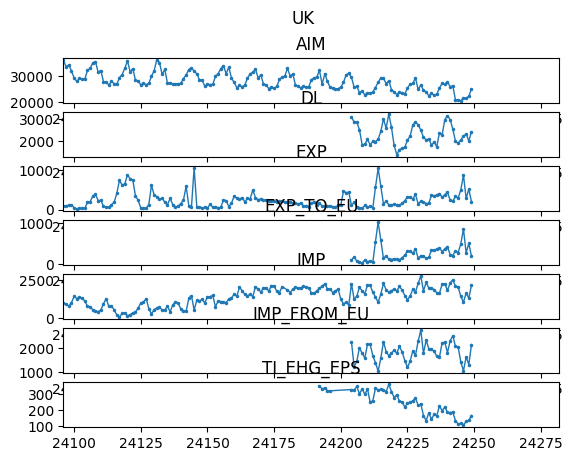

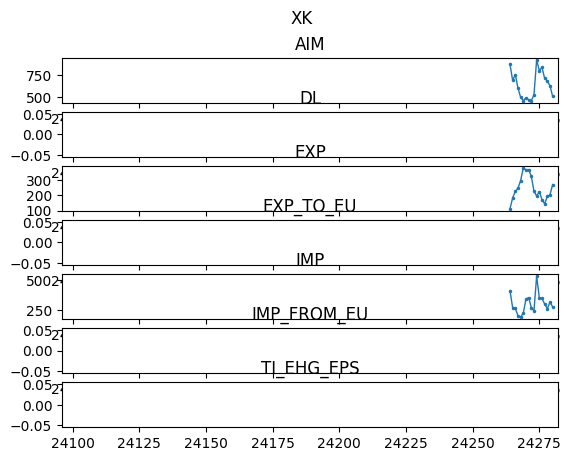

In [4]:
geos = sorted(df['geo'].unique())
nrg_bals = sorted(df['nrg_bal'].unique())
for geo in geos:
    df_by_geo = df[df['geo'] == geo]
    fig, axs = plt.subplots(len(nrg_bals))
    fig.suptitle(geo)
    for i in range(len(nrg_bals)):
        nrg_bal = nrg_bals[i]
        filtered_df = df_by_geo[df['nrg_bal'] == nrg_bal]
        axs[i].set_title(nrg_bal)
        axs[i].set_xlim([tpmin, tpmax])
        axs[i].plot(filtered_df['TIME_PERIOD'], filtered_df['OBS_VALUE'], marker='.', ms=3, linewidth=1)
    plt.show()

After removing zero values, only MD country shows dirty data.

Many time series are missing at all, some show missing values.

Some country show a few data or old data (a multi-step forecasting is necessary).

In [10]:
df[df['TIME_PERIOD'] >= 2023*12+(7-1)]

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
2507,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,AIM,E7000,GWH,FR,24282,30022.349,NaN
7481,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,DL,E7000,GWH,FR,24282,2360.522,e
11728,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,EXP,E7000,GWH,FR,24282,6148.924,NaN
16702,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,EXP_TO_EU,E7000,GWH,FR,24282,4616.155,NaN
21021,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,IMP,E7000,GWH,FR,24282,1737.802,NaN
25995,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,IMP_FROM_EU,E7000,GWH,FR,24282,861.335,NaN
29090,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,TI_EHG_EPS,E7000,GWH,FR,24282,383.677,NaN
4753,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,AIM,E7000,GWH,NO,24282,7889.501,NaN
8532,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,DL,E7000,GWH,NO,24282,704.035,e
13974,ESTAT:NRG_CB_EM(1.0),31/08/23 23:00:00,M,EXP,E7000,GWH,NO,24282,3207.439,NaN


In [8]:
df[df['TIME_PERIOD'] >= 2023*12+(8-1)]

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG


There are no data for August 2023! So a multi-step forecast is mandatory to forecast September 2023.